In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()


In [2]:
car_data=pd.read_csv('train-data.csv')
car_data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [3]:
car_data.shape

(6019, 14)

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
car_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
car_data['Mileage'].fillna(0, inplace = True)
car_data['Engine'].fillna(0, inplace = True)
car_data['Power'].fillna(0, inplace = True)
car_data['Seats'].fillna(0, inplace = True)


In [7]:
car_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

In [8]:
#splitting number and object
for i in range(car_data.shape[0]):
    car_data.at[i, 'Company'] =  car_data['Name'][i].split()[0].upper()
    car_data.at[i, 'Mileage_kmpl'] = str(car_data['Mileage'][i]).split()[0].upper()
    car_data.at[i, 'Engine_CC'] = str(car_data['Engine'][i]).split()[0].upper()
    car_data.at[i, 'Power_bhp'] = str( car_data['Power'][i]).split()[0].upper()
    
car_data.head(15)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage_kmpl,Engine_CC,Power_bhp
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,MARUTI,26.6,998,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,HYUNDAI,19.67,1582,126.2
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,HONDA,18.2,1199,88.7
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,MARUTI,20.77,1248,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,AUDI,15.2,1968,140.8
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35,HYUNDAI,21.1,814,55.2
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,NISSAN,23.08,1461,63.1
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50,TOYOTA,11.36,2755,171.5
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20,VOLKSWAGEN,20.54,1598,103.6
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95,TATA,22.3,1248,74


In [9]:
car_data['Power_bhp'] = car_data['Power_bhp'].apply(lambda x: 0 if x =='NULL' else x)
car_data['Mileage_kmpl'] =car_data['Mileage_kmpl'].astype(float)
car_data['Engine_CC'] = car_data['Engine_CC'].astype(float)
car_data['Power_bhp'] = car_data['Power_bhp'].astype(float)                       

car_data.head(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage_kmpl,Engine_CC,Power_bhp
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,MARUTI,26.60,998.0,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,HYUNDAI,19.67,1582.0,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,HONDA,18.20,1199.0,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,MARUTI,20.77,1248.0,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,AUDI,15.20,1968.0,140.80
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35,HYUNDAI,21.10,814.0,55.20
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,NISSAN,23.08,1461.0,63.10
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50,TOYOTA,11.36,2755.0,171.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20,VOLKSWAGEN,20.54,1598.0,103.60
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95,TATA,22.30,1248.0,74.00


In [10]:
car_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
Company                 0
Mileage_kmpl            0
Engine_CC               0
Power_bhp               0
dtype: int64

In [11]:
car_data['Mileage_kmpl'].fillna(car_data['Mileage_kmpl'].mean(), inplace = True)
car_data['Engine_CC'].fillna(car_data['Engine_CC'].mean(), inplace = True)
car_data['Power_bhp'].fillna(car_data['Power_bhp'].mean(), inplace = True)
car_data['Seats'].fillna(car_data['Seats'].mode(), inplace = True)

In [12]:
car_data.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price', 'Company', 'Mileage_kmpl', 'Engine_CC',
       'Power_bhp'],
      dtype='object')

In [13]:
car_data.drop(columns=['Unnamed: 0','Name','Mileage','Engine','Power','New_Price'],inplace=True)

car_data.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage_kmpl,Engine_CC,Power_bhp
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,MARUTI,26.60,998.0,58.16
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,HYUNDAI,19.67,1582.0,126.20
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,HONDA,18.20,1199.0,88.70
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,MARUTI,20.77,1248.0,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,AUDI,15.20,1968.0,140.80
5,Hyderabad,2012,75000,LPG,Manual,First,5.0,2.35,HYUNDAI,21.10,814.0,55.20
6,Jaipur,2013,86999,Diesel,Manual,First,5.0,3.50,NISSAN,23.08,1461.0,63.10
7,Mumbai,2016,36000,Diesel,Automatic,First,8.0,17.50,TOYOTA,11.36,2755.0,171.50
8,Pune,2013,64430,Diesel,Manual,First,5.0,5.20,VOLKSWAGEN,20.54,1598.0,103.60
9,Chennai,2012,65932,Diesel,Manual,Second,5.0,1.95,TATA,22.30,1248.0,74.00


In [14]:
car_data.shape

(6019, 12)

In [15]:
car_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Seats              6019 non-null   float64
 7   Price              6019 non-null   float64
 8   Company            6019 non-null   object 
 9   Mileage_kmpl       6019 non-null   float64
 10  Engine_CC          6019 non-null   float64
 11  Power_bhp          6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [16]:
car_data['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Ahmedabad'),
  Text(1, 0, 'Bangalore'),
  Text(2, 0, 'Chennai'),
  Text(3, 0, 'Coimbatore'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad'),
  Text(6, 0, 'Jaipur'),
  Text(7, 0, 'Kochi'),
  Text(8, 0, 'Kolkata'),
  Text(9, 0, 'Mumbai'),
  Text(10, 0, 'Pune')])

<Figure size 1080x360 with 0 Axes>

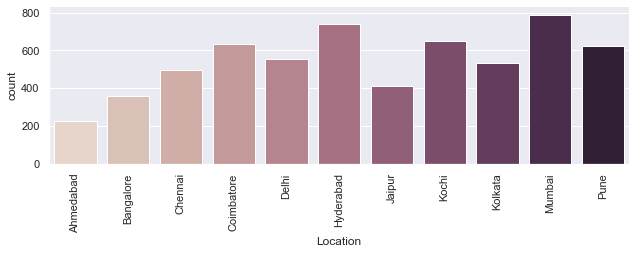

In [17]:
var = "Location"
plt.figure(figsize=(15, 5))
sns.catplot(x=var, kind="count", palette="ch:.15", 
            height=3, aspect=3, data=car_data.sort_values('Location'))
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013'),
  Text(16, 0, '2014'),
  Text(17, 0, '2015'),
  Text(18, 0, '2016'),
  Text(19, 0, '2017'),
  Text(20, 0, '2018'),
  Text(21, 0, '2019')])

<Figure size 1080x360 with 0 Axes>

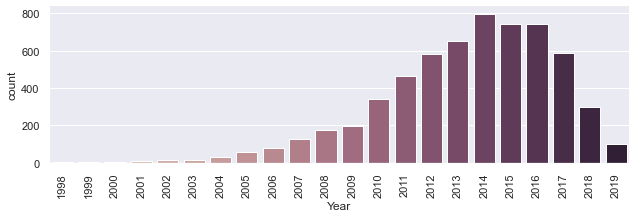

In [18]:
var = "Year"
plt.figure(figsize=(15, 5))
sns.catplot(x=var, kind="count", palette="ch:.15", height=3, 
            aspect=3, data=car_data.sort_values('Year'));
plt.xticks(rotation=90)

In [19]:
car_data['age'] = 2022 - car_data['Year']
car_data['age'] =car_data['age'].apply(lambda x: 15 if x >14 else x)
car_data = car_data.drop(['Year'],axis = 1)
car_data.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage_kmpl,Engine_CC,Power_bhp,age
0,Mumbai,72000,CNG,Manual,First,5.0,1.75,MARUTI,26.60,998.0,58.16,12
1,Pune,41000,Diesel,Manual,First,5.0,12.50,HYUNDAI,19.67,1582.0,126.20,7
2,Chennai,46000,Petrol,Manual,First,5.0,4.50,HONDA,18.20,1199.0,88.70,11
3,Chennai,87000,Diesel,Manual,First,7.0,6.00,MARUTI,20.77,1248.0,88.76,10
4,Coimbatore,40670,Diesel,Automatic,Second,5.0,17.74,AUDI,15.20,1968.0,140.80,9


In [20]:
car_data['Fuel_Type'].describe()

count       6019
unique         5
top       Diesel
freq        3205
Name: Fuel_Type, dtype: object

In [21]:
car_data['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [22]:
car_data['Fuel_Type'] = car_data['Fuel_Type'].\
       apply(lambda x: "Clean_Fuel" if x not in ['Diesel', 'Petrol'] else x)


car_data['Fuel_Type'].unique()

array(['Clean_Fuel', 'Diesel', 'Petrol'], dtype=object)

In [23]:
var = 'Fuel_Type'
car_data[var].value_counts()

Diesel        3205
Petrol        2746
Clean_Fuel      68
Name: Fuel_Type, dtype: int64

<Figure size 720x504 with 0 Axes>

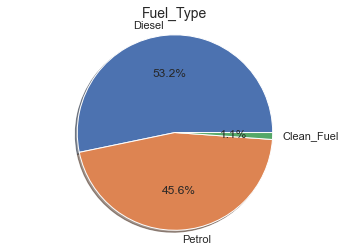

In [24]:
var = "Fuel_Type"
plt.figure(figsize=(10, 7))
labels = ['Diesel', 'Petrol',"Clean_Fuel"]
sizes = [car_data['Fuel_Type'].value_counts()[0],
         car_data['Fuel_Type'].value_counts()[1],
         car_data['Fuel_Type'].value_counts()[2],
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title(var, fontsize=14)
plt.show()

In [25]:
car_data['Transmission'].describe()

count       6019
unique         2
top       Manual
freq        4299
Name: Transmission, dtype: object

In [26]:
car_data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

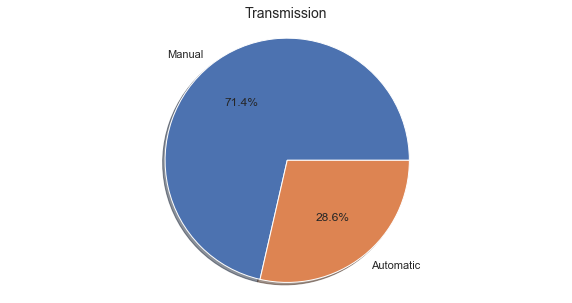

In [27]:
var = "Transmission"
plt.figure(figsize=(10, 5))
labels = ['Manual', 'Automatic']
sizes = [car_data['Transmission'].value_counts()[0],
         car_data['Transmission'].value_counts()[1],
        ]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title(var, fontsize=14);
plt.show()

<Figure size 720x360 with 0 Axes>

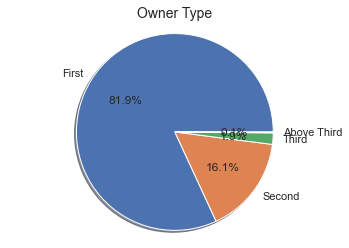

In [28]:
var = "Owner Type"
plt.figure(figsize=(10, 5))
labels = ['First', 'Second',"Third","Above Third"]
sizes = [car_data['Owner_Type'].value_counts()[0],
         car_data['Owner_Type'].value_counts()[1],
         car_data['Owner_Type'].value_counts()[2],
         car_data['Owner_Type'].value_counts()[3],
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

<Figure size 720x360 with 0 Axes>

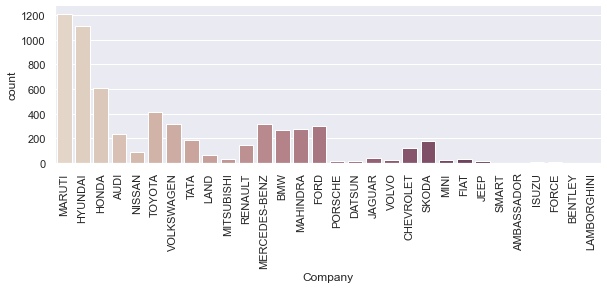

In [29]:
var = 'Company'
#data_train[var].value_counts()
plt.figure(figsize=(10, 5))
sns.catplot(x=var, kind="count", palette="ch:.20", height=3, aspect=3, data=car_data);
plt.xticks(rotation=90);


<AxesSubplot:xlabel='Price', ylabel='Density'>

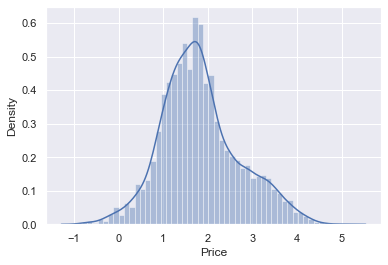

In [30]:


sns.distplot(np.log(car_data['Price']))

In [31]:
car_data.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [32]:
car_data.Transmission.replace({'Manual':0,'Automatic':1}, inplace=True)
car_data.Owner_Type.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4}, inplace=True)
car_data[['Transmission','Owner_Type']]

,Transmission,Owner_Type
0,0,1
1,0,1
2,0,1
3,0,1
4,1,2
...,...,...
6014,0,1
6015,0,1
6016,0,2
6017,0,1


<AxesSubplot:>

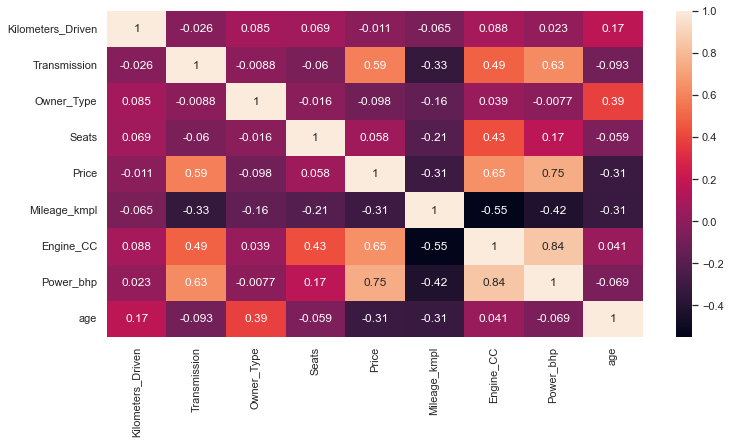

In [33]:
corr = car_data.corr()
plt.subplots(figsize=(12,6))
sns.heatmap(corr, annot=True)

In [34]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Kilometers_Driven  6019 non-null   int64  
 2   Fuel_Type          6019 non-null   object 
 3   Transmission       6019 non-null   int64  
 4   Owner_Type         6019 non-null   int64  
 5   Seats              6019 non-null   float64
 6   Price              6019 non-null   float64
 7   Company            6019 non-null   object 
 8   Mileage_kmpl       6019 non-null   float64
 9   Engine_CC          6019 non-null   float64
 10  Power_bhp          6019 non-null   float64
 11  age                6019 non-null   int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 564.4+ KB


In [35]:
car_data['Fuel_Type'].unique()

array(['Clean_Fuel', 'Diesel', 'Petrol'], dtype=object)

In [36]:
car_data['Fuel_Type']=car_data['Fuel_Type'].\
               map({'Clean_Fuel':1, 'Diesel':2, 'Petrol':3})
car_data

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage_kmpl,Engine_CC,Power_bhp,age
0,Mumbai,72000,1,0,1,5.0,1.75,MARUTI,26.60,998.0,58.16,12
1,Pune,41000,2,0,1,5.0,12.50,HYUNDAI,19.67,1582.0,126.20,7
2,Chennai,46000,3,0,1,5.0,4.50,HONDA,18.20,1199.0,88.70,11
3,Chennai,87000,2,0,1,7.0,6.00,MARUTI,20.77,1248.0,88.76,10
4,Coimbatore,40670,2,1,2,5.0,17.74,AUDI,15.20,1968.0,140.80,9
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,27365,2,0,1,5.0,4.75,MARUTI,28.40,1248.0,74.00,8
6015,Jaipur,100000,2,0,1,5.0,4.00,HYUNDAI,24.40,1120.0,71.00,7
6016,Jaipur,55000,2,0,2,8.0,2.90,MAHINDRA,14.00,2498.0,112.00,10
6017,Kolkata,46000,3,0,1,5.0,2.65,MARUTI,18.90,998.0,67.10,9


In [37]:
car_data['Company'].unique()

array(['MARUTI', 'HYUNDAI', 'HONDA', 'AUDI', 'NISSAN', 'TOYOTA',
       'VOLKSWAGEN', 'TATA', 'LAND', 'MITSUBISHI', 'RENAULT',
       'MERCEDES-BENZ', 'BMW', 'MAHINDRA', 'FORD', 'PORSCHE', 'DATSUN',
       'JAGUAR', 'VOLVO', 'CHEVROLET', 'SKODA', 'MINI', 'FIAT', 'JEEP',
       'SMART', 'AMBASSADOR', 'ISUZU', 'FORCE', 'BENTLEY', 'LAMBORGHINI'],
      dtype=object)

In [38]:
car_data['Company'].nunique()

30

In [39]:
car_data['Company']=car_data['Company'].map({'MARUTI':1, 'HYUNDAI':2, 'HONDA':3, 'AUDI':4, 'NISSAN':5, 'TOYOTA':6,'VOLKSWAGEN':7, 'TATA':8, 'LAND':9, 'MITSUBISHI':10, 'RENAULT':11,'MERCEDES-BENZ':12, 'BMW':13, 'MAHINDRA':14, 'FORD':15, 'PORSCHE':16, 'DATSUN':17,'JAGUAR':18, 'VOLVO':19, 'CHEVROLET':20, 'SKODA':21, 'MINI':22, 'FIAT':23, 'JEEP':24,'SMART':25, 'AMBASSADOR':26, 'ISUZU':27,'FORCE':28, 'BENTLEY':29, 'LAMBORGHINI':30})
car_data

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage_kmpl,Engine_CC,Power_bhp,age
0,Mumbai,72000,1,0,1,5.0,1.75,1,26.60,998.0,58.16,12
1,Pune,41000,2,0,1,5.0,12.50,2,19.67,1582.0,126.20,7
2,Chennai,46000,3,0,1,5.0,4.50,3,18.20,1199.0,88.70,11
3,Chennai,87000,2,0,1,7.0,6.00,1,20.77,1248.0,88.76,10
4,Coimbatore,40670,2,1,2,5.0,17.74,4,15.20,1968.0,140.80,9
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,27365,2,0,1,5.0,4.75,1,28.40,1248.0,74.00,8
6015,Jaipur,100000,2,0,1,5.0,4.00,2,24.40,1120.0,71.00,7
6016,Jaipur,55000,2,0,2,8.0,2.90,14,14.00,2498.0,112.00,10
6017,Kolkata,46000,3,0,1,5.0,2.65,1,18.90,998.0,67.10,9


In [40]:
car_data['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [41]:
car_data['Location']=car_data['Location'].map({'Mumbai':1, 'Pune':2, 'Chennai':3, 'Coimbatore':4, 'Hyderabad':5, 'Jaipur':6,
       'Kochi':7, 'Kolkata':8, 'Delhi':9, 'Bangalore':10, 'Ahmedabad':11})
car_data

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage_kmpl,Engine_CC,Power_bhp,age
0,1,72000,1,0,1,5.0,1.75,1,26.60,998.0,58.16,12
1,2,41000,2,0,1,5.0,12.50,2,19.67,1582.0,126.20,7
2,3,46000,3,0,1,5.0,4.50,3,18.20,1199.0,88.70,11
3,3,87000,2,0,1,7.0,6.00,1,20.77,1248.0,88.76,10
4,4,40670,2,1,2,5.0,17.74,4,15.20,1968.0,140.80,9
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,9,27365,2,0,1,5.0,4.75,1,28.40,1248.0,74.00,8
6015,6,100000,2,0,1,5.0,4.00,2,24.40,1120.0,71.00,7
6016,6,55000,2,0,2,8.0,2.90,14,14.00,2498.0,112.00,10
6017,8,46000,3,0,1,5.0,2.65,1,18.90,998.0,67.10,9


In [42]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   int64  
 1   Kilometers_Driven  6019 non-null   int64  
 2   Fuel_Type          6019 non-null   int64  
 3   Transmission       6019 non-null   int64  
 4   Owner_Type         6019 non-null   int64  
 5   Seats              6019 non-null   float64
 6   Price              6019 non-null   float64
 7   Company            6019 non-null   int64  
 8   Mileage_kmpl       6019 non-null   float64
 9   Engine_CC          6019 non-null   float64
 10  Power_bhp          6019 non-null   float64
 11  age                6019 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 564.4 KB


In [43]:
car_data.columns

Index(['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'Company', 'Mileage_kmpl', 'Engine_CC',
       'Power_bhp', 'age'],
      dtype='object')

In [44]:
X = car_data[['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Company', 'Mileage_kmpl', 'Engine_CC',
       'Power_bhp', 'age']]
y = car_data[['Price']]

In [45]:
print(X)
print(y)

      Location  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Seats  \
0            1              72000          1             0           1    5.0   
1            2              41000          2             0           1    5.0   
2            3              46000          3             0           1    5.0   
3            3              87000          2             0           1    7.0   
4            4              40670          2             1           2    5.0   
...        ...                ...        ...           ...         ...    ...   
6014         9              27365          2             0           1    5.0   
6015         6             100000          2             0           1    5.0   
6016         6              55000          2             0           2    8.0   
6017         8              46000          3             0           1    5.0   
6018         5              47000          2             0           1    5.0   

      Company  Mileage_kmpl

In [46]:
print(X.shape)
print(y.shape)

(6019, 11)
(6019, 1)


In [56]:
#Scaling
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_scale = scale.fit_transform(X)
print(X_scale)
print(type(X_scale ))
print(X_scale.shape)

[[-1.44907077  0.14531489 -2.78301763 ... -1.00192768 -0.93656959
   1.14097091]
 [-1.11484495 -0.19436922 -0.85695311 ... -0.04830102  0.27948594
  -0.51233544]
 [-0.78061913 -0.13958146  1.06911141 ... -0.67371028 -0.39073867
   0.81030964]
 ...
 [ 0.22205832 -0.0409635  -0.85695311 ...  1.44745585  0.02569422
   0.47964837]
 [ 0.89050996 -0.13958146  1.06911141 ... -1.00192768 -0.77678804
   0.1489871 ]
 [-0.1121675  -0.12862391 -0.85695311 ... -1.10316886 -0.94657827
   0.81030964]]
<class 'numpy.ndarray'>
(6019, 11)


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
              train_test_split(X, y, test_size = 0.2, random_state = 25)

In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [59]:
from sklearn.metrics import r2_score

print("LR:", r2_score(y_test,y_pred)*100)

LR: 69.83527120172035


In [50]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)

print("DTR:", r2_score(y_test,y_pred)*100)

DTR: 65.03395956816686


In [51]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

print("RFC:", r2_score(y_test, y_pred)*100)

RFC: 87.30978273583953


In [52]:
from sklearn.ensemble import ExtraTreesRegressor
et_reg = ExtraTreesRegressor()

et_reg.fit(X_train, y_train)
y_pred= et_reg.predict(X_test)

print("XTC:", r2_score(y_test, y_pred)*100)

XTC: 88.3479585046702


In [53]:
y_pred=et_reg.predict(np.array([1,72000,1,0,1,5.0, 1,26.60,998.0,58.16,12 ]).reshape(1, -1))
print(y_pred[0])


1.75


In [54]:
y_pred=et_reg.predict(np.array([2,41000,2,0,1,5.0,2,19.67,1582.0,126.20,5]).reshape(1, -1))
print(y_pred[0])



13.689299999999994


In [55]:
import pickle
pickle.dump(et_reg,open('carpred.pkl','wb'))